# **ViT Based Birds Species Classifier**
We chose this model from hugging face because it was a bird specific image classifier. This model is actually a finetuned version of the google Vision Transformation (ViT) model on birds_species_dataset. The ViT model uses images of (224*224) resolution. ViT uses the transformer architecture which captures relationships between different elements in a sequence. Initially, the architecture was designed for natural language processing tasks, here it is applied to patches of images. Unlike traditional convolutional neural networks (CNNs) that operate on spatially neighboring pixels, ViT breaks down the input image into fixed-size patches. Each patch is treated as a token and undergoes linear projection to embed it into a high-dimensional space.

#**Load Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import zipfile
import os
# zip_file_path = '/content/drive/MyDrive/AI_updated data /x_train.zip'
zip_file_path = '/content/drive/MyDrive/x_train.zip'
extract_dir = '/content/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# zip_file_path = '/content/drive/MyDrive/AI_updated data /x_test.zip'
zip_file_path = '/content/drive/MyDrive/x_test.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [4]:
import h5py
# y_train_h5_path = '/content/drive/MyDrive/AI_updated data /y_train.h5'
# y_test_h5_path = '/content/drive/MyDrive/AI_updated data /y_test.h5'
y_train_h5_path = '/content/drive/MyDrive/y_train.h5'
y_test_h5_path = '/content/drive/MyDrive/y_test.h5'

# Open the HDF5 file for reading
with h5py.File(y_train_h5_path, 'r') as hf:
    # Read the dataset
    y_train = hf['y_train'][:]
    # Convert the dataset to a list of strings
    # y_train_list = [str(item, 'utf-8') for item in y_train]
    y_train_list = [int(item) for item in y_train]

# Open the HDF5 file for reading
with h5py.File(y_test_h5_path, 'r') as hf:
    # Read the dataset
    y_test = hf['y_test'][:]
    # Convert the dataset to a list of strings
    # y_test_list = [str(item, 'utf-8') for item in y_test]
    y_test_list = [int(item) for item in y_test]

# Open the HDF5 file for reading
with h5py.File('x_train.h5', 'r') as hf:
    # Read the dataset
    x_train = hf['x_train'][:]

# Open the HDF5 file for reading
with h5py.File('x_test.h5', 'r') as hf:
    # Read the dataset
    x_test = hf['x_test'][:]

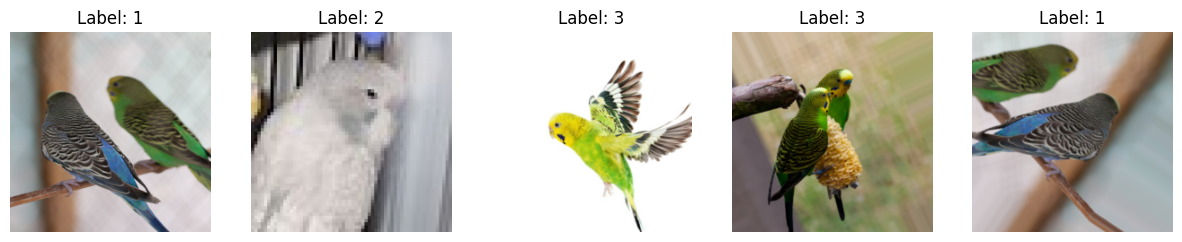

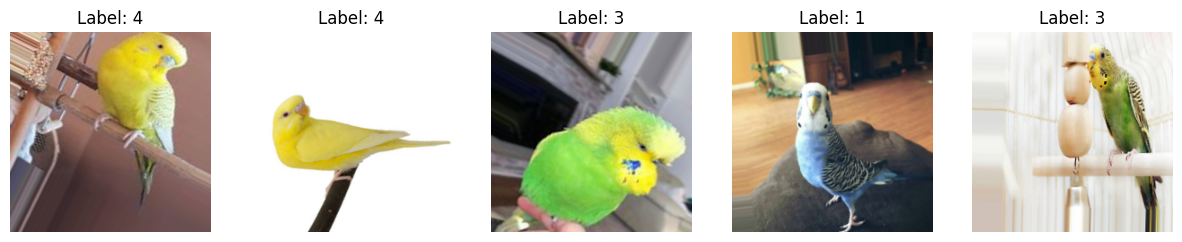

In [5]:
import matplotlib.pyplot as plt

def visualize_images(images, labels):
    num_images = len(images)
    if num_images == 0:
        print("No images found in the HDF5 file.")
        return
    plt.figure(figsize=(15, 5))
    for i, image in enumerate(images[:5]):  # Visualize only the first 5 images
        plt.subplot(1, 5, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title("Label: {}".format(labels[i]))
    plt.show()

visualize_images(x_test, y_test_list)
visualize_images(x_train, y_train_list)

In [6]:
!pip install transformers
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [7]:
from PIL import Image
import numpy as np
from torchvision import transforms

# preprocessing with some extra transforms
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ])

def preprocess_image(image):
    # Convert image to PIL Image if it's not already
    if not isinstance(image, Image.Image):
        image = Image.fromarray(image)
    # Apply preprocessing transforms
    image = preprocess(image).unsqueeze(0)
    return image


#**Model**

In [8]:
from transformers import AutoModelForImageClassification

# Define the model name or path
model_name = "gungbgs/bird_species_classifier"

# Load the pre-trained model
model = AutoModelForImageClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/31.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/345M [00:00<?, ?B/s]

#**Dataloaders**

In [9]:
from sklearn.preprocessing import OneHotEncoder
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import numpy as np
import torch

y_train_strings = [str(label) for label in y_train]
y_train_strings = np.array(y_train_strings).reshape(-1, 1)

# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Fit the encoder on the list of strings
encoder.fit(y_train_strings)

# Transform the list of strings using the encoder
y_train_encoded = encoder.transform(y_train_strings)

# Convert the encoded data to a PyTorch tensor
y_train_tensor = torch.Tensor(y_train_encoded.toarray())

x_train_tensor = torch.Tensor(x_train)
# x_train_tesnor = torch.transpose(x_train_tensor, 1,3)
x_train_tensor = x_train_tensor.permute(0, 3, 1, 2)
# Convert one-hot encoded labels to class indices
y_train_indices = torch.argmax(y_train_tensor, dim=1)

from sklearn.model_selection import StratifiedShuffleSplit

# Splitting indices into train and validation sets
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_indices, val_indices = next(splitter.split(x_train_tensor, y_train_indices))

# Creating datasets and dataloaders for train and validation sets
train_dataset = TensorDataset(x_train_tensor[train_indices], y_train_indices[train_indices])
val_dataset = TensorDataset(x_train_tensor[val_indices], y_train_indices[val_indices])

# Create DataLoader instances for train and validation sets
train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=20, shuffle=False)

In [10]:
y_test_strings = [str(label) for label in y_test]
y_test_strings = np.array(y_test_strings).reshape(-1, 1)

# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Fit the encoder on the list of strings
encoder.fit(y_test_strings)

# Transform the list of strings using the encoder
y_test_encoded = encoder.transform(y_test_strings)

# Convert the encoded data to a PyTorch tensor
y_test_tensor = torch.Tensor(y_test_encoded.toarray())

x_test_tensor = torch.Tensor(x_test)
# x_test_tesnor = torch.transpose(x_test_tensor, 1,3)
x_test_tensor = x_test_tensor.permute(0, 3, 1, 2)
# Convert one-hot encoded labels to class indices
y_test_indices = torch.argmax(y_test_tensor, dim=1)

# Create a TensorDataset with class indices as labels
dataset = TensorDataset(x_test_tensor, y_test_indices)

# Create a DataLoader
test_dataloader = DataLoader(dataset, batch_size=20, shuffle=True)


In [11]:
# Iterate over the first batch in the DataLoader
for batch in train_dataloader:
    # Unpack the batch into inputs and labels
    inputs, labels = batch

    # Print the shape of the inputs and labels
    print("Input shape:", inputs.shape)
    print("Label shape:", labels.shape)

    # Optionally, print the first few elements of the inputs and labels
    print("First few elements of inputs:", inputs[:5])
    print("First few elements of labels:", labels[:5])

    # Break the loop after inspecting the first batch
    break

Input shape: torch.Size([20, 3, 224, 224])
Label shape: torch.Size([20])
First few elements of inputs: tensor([[[[0.8667, 0.8667, 0.8667,  ..., 0.8078, 0.8078, 0.8078],
          [0.8667, 0.8667, 0.8667,  ..., 0.8078, 0.8078, 0.8069],
          [0.8667, 0.8667, 0.8667,  ..., 0.8063, 0.8048, 0.8039],
          ...,
          [0.2919, 0.2903, 0.2860,  ..., 0.3364, 0.3271, 0.3233],
          [0.2844, 0.2798, 0.2784,  ..., 0.3395, 0.3317, 0.3218],
          [0.2784, 0.2784, 0.2800,  ..., 0.3418, 0.3353, 0.3255]],

         [[0.8549, 0.8549, 0.8549,  ..., 0.7961, 0.7961, 0.7961],
          [0.8549, 0.8549, 0.8549,  ..., 0.7961, 0.7961, 0.7951],
          [0.8549, 0.8549, 0.8549,  ..., 0.7946, 0.7930, 0.7922],
          ...,
          [0.2017, 0.2001, 0.1958,  ..., 0.2658, 0.2565, 0.2528],
          [0.1942, 0.1896, 0.1882,  ..., 0.2689, 0.2611, 0.2512],
          [0.1882, 0.1882, 0.1875,  ..., 0.2713, 0.2647, 0.2549]],

         [[0.8353, 0.8353, 0.8353,  ..., 0.7765, 0.7765, 0.7765],
     

In [12]:
# create labels
labels = torch.flatten(labels)
print(labels)

tensor([4, 3, 3, 1, 2, 0, 1, 4, 3, 0, 2, 3, 3, 1, 0, 1, 0, 1, 1, 2])


#**Training and Testing**

In [13]:
import torch.optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
from keras.callbacks import ReduceLROnPlateau

# Define your optimizer and any other necessary components
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=2, verbose=True)  # Learning rate scheduler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define your training loop with gradient accumulation
def train_epoch(model, dataloader, optimizer, device, accumulation_steps):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0
    accumulated_loss = 0.0

    for i, (images, labels) in enumerate(tqdm(dataloader, desc="Training")):
        images, labels = images.to(device), labels.to(device)
        labels = torch.flatten(labels).long()
        labels = labels.view(-1)

        optimizer.zero_grad()
        outputs = model(images)

        if hasattr(outputs, 'logits'):
              outputs = outputs.logits

        loss = F.cross_entropy(outputs, labels)
        loss.backward()

        # Accumulate gradients
        accumulated_loss += loss.item()

        if (i + 1) % accumulation_steps == 0:
            # Update parameters every accumulation_steps batches
            optimizer.step()
            optimizer.zero_grad()
            total_loss += accumulated_loss
            accumulated_loss = 0.0

            # Detach intermediate tensors to release memory
            images.detach()
            labels.detach()
            outputs.detach()
            torch.cuda.empty_cache()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Update parameters for any remaining accumulated gradients
    if accumulated_loss > 0:
        optimizer.step()
        total_loss += accumulated_loss

    # Detach remaining tensors to release memory
    images.detach()
    labels.detach()
    outputs.detach()
    torch.cuda.empty_cache()

    accuracy = correct / total
    avg_loss = total_loss / len(dataloader)

    return avg_loss, accuracy

# Define your validation loop
def evaluate(model, dataloader, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if hasattr(outputs, 'logits'):
              outputs = outputs.logits

            loss = F.cross_entropy(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    avg_loss = total_loss / len(dataloader)

    return avg_loss, accuracy

num_epochs = 7
accumulation_steps = 4

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_epoch(model, train_dataloader, optimizer, device, accumulation_steps)
    val_loss, val_accuracy = evaluate(model, val_dataloader, device)

    print(f"\nEpoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}\n")


Validation: 100%|██████████| 5/5 [00:00<00:00,  5.76it/s]



Epoch 1/7, Train Loss: 5.1352, Train Accuracy: 0.1627, Val Loss: 3.5446, Val Accuracy: 0.2262



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.85it/s]



Epoch 2/7, Train Loss: 3.0994, Train Accuracy: 0.2681, Val Loss: 2.2995, Val Accuracy: 0.3690



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.86it/s]



Epoch 3/7, Train Loss: 2.1013, Train Accuracy: 0.2199, Val Loss: 1.7093, Val Accuracy: 0.3452



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.74it/s]



Epoch 4/7, Train Loss: 1.6657, Train Accuracy: 0.2922, Val Loss: 1.4515, Val Accuracy: 0.5119



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.52it/s]



Epoch 5/7, Train Loss: 1.4930, Train Accuracy: 0.3735, Val Loss: 1.3974, Val Accuracy: 0.3452



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]



Epoch 6/7, Train Loss: 1.4541, Train Accuracy: 0.3283, Val Loss: 1.2524, Val Accuracy: 0.4524



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.46it/s]


Epoch 7/7, Train Loss: 1.3414, Train Accuracy: 0.4006, Val Loss: 2.0607, Val Accuracy: 0.1905



# Results
Using a confusion matrix we can observe how the model classifies the set of images. Sometimes, the model classifies all images under one column (which is the predicted label), meaning it throws everything under one label, hardily accurrate.

Upon rerunning the code, the model gets more accurate, on this run it achieved 41% accuracy. With this confusion matrix, we can see that the model predicted images into more than one label.

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def test(model, dataloader, device):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Testing"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if hasattr(outputs, 'logits'):
                outputs = outputs.logits

            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    # Compute accuracy
    accuracy = accuracy_score(all_labels, all_predictions)

    # Compute precision
    precision = precision_score(all_labels, all_predictions, average='macro')

    # Compute recall
    recall = recall_score(all_labels, all_predictions, average='macro')

    return cm, accuracy, precision, recall

# Test the model
test_cm, test_accuracy, test_precision, test_recall = test(model, test_dataloader, device)

print("Test Confusion Matrix:")
print(test_cm)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Testing: 100%|██████████| 9/9 [00:01<00:00,  4.63it/s]


Test Confusion Matrix:
[[ 0  0 45  0  0]
 [ 0  0 34  0  0]
 [ 0  0 39  0  0]
 [ 0  3 24  0  0]
 [ 0  4 30  0  0]]
Test Accuracy: 0.21787709497206703
Test Precision: 0.04534883720930232
Test Recall: 0.2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Initialize model**

In [15]:
from transformers import AutoModelForImageClassification

# Define the model name or path
model_name = "gungbgs/bird_species_classifier"

# Load the pre-trained model
model = AutoModelForImageClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


# The "Move Around" on the encoder
Maybe the OneHotEncoder() is not what we are looking for. This is a work around for it.

Let's reset the model and data to discover.

In [16]:
# zip_file_path = '/content/drive/MyDrive/AI_updated data /x_train.zip'
zip_file_path = '/content/drive/MyDrive/x_train.zip'
extract_dir = '/content/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# zip_file_path = '/content/drive/MyDrive/AI_updated data /x_test.zip'
zip_file_path = '/content/drive/MyDrive/x_test.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [17]:
# Open the HDF5 file for reading
with h5py.File(y_train_h5_path, 'r') as hf:
    # Read the dataset
    y_train = hf['y_train'][:]
    # Convert the dataset to a list of strings
    # y_train_list = [str(item, 'utf-8') for item in y_train]
    y_train_list = [int(item) for item in y_train]

# Open the HDF5 file for reading
with h5py.File(y_test_h5_path, 'r') as hf:
    # Read the dataset
    y_test = hf['y_test'][:]
    # Convert the dataset to a list of strings
    # y_test_list = [str(item, 'utf-8') for item in y_test]
    y_test_list = [int(item) for item in y_test]

# Open the HDF5 file for reading
with h5py.File('x_train.h5', 'r') as hf:
    # Read the dataset
    x_train = hf['x_train'][:]

# Open the HDF5 file for reading
with h5py.File('x_test.h5', 'r') as hf:
    # Read the dataset
    x_test = hf['x_test'][:]

This is a different way of loading in the data without using the OneHotEncoder() as above.

In [18]:
batch_size = 16

# convert to tensor
y_train_tensor = torch.LongTensor(y_train_list)

# Convert to tensor and transpose
x_train_tensor = torch.Tensor(x_train)
x_train_tensor = torch.transpose(x_train_tensor, 1, 3)

print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"x_train_tensor shape: {x_train_tensor.shape}")

# Create a TensorDataset
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)

# Create a DataLoader
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

y_train_tensor shape: torch.Size([416])
x_train_tensor shape: torch.Size([416, 3, 224, 224])


In [19]:
# Convert to tensor
y_test_tensor = torch.LongTensor(y_test_list)

# Convert to tensor and transpose
x_test_tensor = torch.Tensor(x_test)
x_test_tensor = torch.transpose(x_test_tensor, 1, 3)

print(f"y_test_tensor shape: {y_test_tensor.shape}")
print(f"x_test_tensor shape: {x_test_tensor.shape}")

# Create a TensorDataset
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

# Create a DataLoader
testloader = DataLoader(test_dataset, batch_size=batch_size)

y_test_tensor shape: torch.Size([179])
x_test_tensor shape: torch.Size([179, 3, 224, 224])


In [20]:
# create labels
labels = torch.flatten(labels)
print(labels)

tensor([4, 3, 3, 1, 2, 0, 1, 4, 3, 0, 2, 3, 3, 1, 0, 1, 0, 1, 1, 2])


# Retraining and testing

In [21]:
import torch.optim
import torch.nn.functional as F
from torch.optim import SGD
from torch.utils.data import DataLoader
from tqdm import tqdm
from keras.callbacks import ReduceLROnPlateau

# Define your optimizer and any other necessary components
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# optimizer = SGD(model.parameters(), lr=5e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=2, verbose=True)  # Learning rate scheduler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define your training loop with gradient accumulation
def train_epoch(model, dataloader, optimizer, device, accumulation_steps):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0
    accumulated_loss = 0.0

    for i, (images, labels) in enumerate(tqdm(dataloader, desc="Training")):
        images, labels = images.to(device), labels.to(device)
        labels = torch.flatten(labels).long()
        labels = labels.view(-1)

        optimizer.zero_grad()
        outputs = model(images)

        if hasattr(outputs, 'logits'):
              outputs = outputs.logits

        loss = F.cross_entropy(outputs, labels)
        loss.backward()

        # Accumulate gradients
        accumulated_loss += loss.item()

        if (i + 1) % accumulation_steps == 0:
            # Update parameters every accumulation_steps batches
            optimizer.step()
            optimizer.zero_grad()
            total_loss += accumulated_loss
            accumulated_loss = 0.0

            # Detach intermediate tensors to release memory
            images.detach()
            labels.detach()
            outputs.detach()
            torch.cuda.empty_cache()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Update parameters for any remaining accumulated gradients
    if accumulated_loss > 0:
        optimizer.step()
        total_loss += accumulated_loss

    # Detach remaining tensors to release memory
    images.detach()
    labels.detach()
    outputs.detach()
    torch.cuda.empty_cache()

    accuracy = correct / total
    avg_loss = total_loss / len(dataloader)

    return avg_loss, accuracy

# Define your validation loop
def evaluate(model, dataloader, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if hasattr(outputs, 'logits'):
              outputs = outputs.logits

            loss = F.cross_entropy(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # print(predicted)
            # print(labels)

    accuracy = correct / total
    avg_loss = total_loss / len(dataloader)

    return avg_loss, accuracy

num_epochs = 7
accumulation_steps = 4

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_epoch(model, train_dataloader, optimizer, device, accumulation_steps)
    val_loss, val_accuracy = evaluate(model, val_dataloader, device)

    print(f"\nEpoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}\n")


Validation: 100%|██████████| 5/5 [00:00<00:00,  5.63it/s]



Epoch 1/7, Train Loss: 5.0934, Train Accuracy: 0.1717, Val Loss: 3.7118, Val Accuracy: 0.2262



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.49it/s]



Epoch 2/7, Train Loss: 3.1212, Train Accuracy: 0.2229, Val Loss: 2.2810, Val Accuracy: 0.2024



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.48it/s]



Epoch 3/7, Train Loss: 2.0266, Train Accuracy: 0.2831, Val Loss: 1.6570, Val Accuracy: 0.4048



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]



Epoch 4/7, Train Loss: 1.6037, Train Accuracy: 0.3735, Val Loss: 1.3976, Val Accuracy: 0.4048



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.22it/s]



Epoch 5/7, Train Loss: 1.3577, Train Accuracy: 0.4247, Val Loss: 1.4446, Val Accuracy: 0.3571



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]



Epoch 6/7, Train Loss: 1.3907, Train Accuracy: 0.3434, Val Loss: 1.2489, Val Accuracy: 0.3333



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]


Epoch 7/7, Train Loss: 1.2786, Train Accuracy: 0.4157, Val Loss: 1.2603, Val Accuracy: 0.3810



# Results
Without the encoder, the model performed better at 44%, which is a 3% improvement.

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def test(model, dataloader, device):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Testing"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if hasattr(outputs, 'logits'):
                outputs = outputs.logits

            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    # Compute accuracy
    accuracy = accuracy_score(all_labels, all_predictions)

    # Compute precision
    precision = precision_score(all_labels, all_predictions, average='macro')

    # Compute recall
    recall = recall_score(all_labels, all_predictions, average='macro')

    return cm, accuracy, precision, recall

# Test the model
test_cm, test_accuracy, test_precision, test_recall = test(model, test_dataloader, device)

print("Test Confusion Matrix:")
print(test_cm)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Testing: 100%|██████████| 9/9 [00:02<00:00,  4.38it/s]

Test Confusion Matrix:
[[29  8  8  0  0]
 [ 1 18  8  0  7]
 [19  3 17  0  0]
 [ 0 16  1  0 10]
 [ 0  8  3  0 23]]
Test Accuracy: 0.4860335195530726
Test Precision: 0.39318376713255415
Test Recall: 0.45724484665661136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Epochs >= 7
What happens if the epochs is increased?

In [25]:
import torch.optim
import torch.nn.functional as F
from torch.optim import SGD
from torch.utils.data import DataLoader
from tqdm import tqdm
from keras.callbacks import ReduceLROnPlateau

# Define your optimizer and any other necessary components
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# optimizer = SGD(model.parameters(), lr=5e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=2, verbose=True)  # Learning rate scheduler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define your training loop with gradient accumulation
def train_epoch(model, dataloader, optimizer, device, accumulation_steps):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0
    accumulated_loss = 0.0

    for i, (images, labels) in enumerate(tqdm(dataloader, desc="Training")):
        images, labels = images.to(device), labels.to(device)
        labels = torch.flatten(labels).long()
        labels = labels.view(-1)

        optimizer.zero_grad()
        outputs = model(images)

        if hasattr(outputs, 'logits'):
              outputs = outputs.logits

        loss = F.cross_entropy(outputs, labels)
        loss.backward()

        # Accumulate gradients
        accumulated_loss += loss.item()

        if (i + 1) % accumulation_steps == 0:
            # Update parameters every accumulation_steps batches
            optimizer.step()
            optimizer.zero_grad()
            total_loss += accumulated_loss
            accumulated_loss = 0.0

            # Detach intermediate tensors to release memory
            images.detach()
            labels.detach()
            outputs.detach()
            torch.cuda.empty_cache()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Update parameters for any remaining accumulated gradients
    if accumulated_loss > 0:
        optimizer.step()
        total_loss += accumulated_loss

    # Detach remaining tensors to release memory
    images.detach()
    labels.detach()
    outputs.detach()
    torch.cuda.empty_cache()

    accuracy = correct / total
    avg_loss = total_loss / len(dataloader)

    return avg_loss, accuracy

# Define your validation loop
def evaluate(model, dataloader, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Validation"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if hasattr(outputs, 'logits'):
              outputs = outputs.logits

            loss = F.cross_entropy(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # print(predicted)
            # print(labels)

    accuracy = correct / total
    avg_loss = total_loss / len(dataloader)

    return avg_loss, accuracy

num_epochs = 14
accumulation_steps = 4

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_epoch(model, train_dataloader, optimizer, device, accumulation_steps)
    val_loss, val_accuracy = evaluate(model, val_dataloader, device)

    print(f"\nEpoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}\n")


Validation: 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]



Epoch 1/14, Train Loss: 1.7427, Train Accuracy: 0.1657, Val Loss: 1.6557, Val Accuracy: 0.2024



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]



Epoch 2/14, Train Loss: 1.6269, Train Accuracy: 0.2048, Val Loss: 1.6959, Val Accuracy: 0.2024



Validation: 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]



Epoch 3/14, Train Loss: 1.7624, Train Accuracy: 0.1988, Val Loss: 1.6420, Val Accuracy: 0.2024



Validation: 100%|██████████| 5/5 [00:01<00:00,  4.97it/s]



Epoch 4/14, Train Loss: 1.6365, Train Accuracy: 0.2048, Val Loss: 1.6237, Val Accuracy: 0.2262



Validation: 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]



Epoch 5/14, Train Loss: 1.6377, Train Accuracy: 0.2199, Val Loss: 1.6499, Val Accuracy: 0.1786



Validation: 100%|██████████| 5/5 [00:01<00:00,  4.98it/s]



Epoch 6/14, Train Loss: 1.6431, Train Accuracy: 0.1777, Val Loss: 1.6559, Val Accuracy: 0.1786



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.03it/s]



Epoch 7/14, Train Loss: 1.6215, Train Accuracy: 0.2048, Val Loss: 1.6173, Val Accuracy: 0.2024



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]



Epoch 8/14, Train Loss: 1.6296, Train Accuracy: 0.1837, Val Loss: 1.6140, Val Accuracy: 0.2262



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]



Epoch 9/14, Train Loss: 1.6218, Train Accuracy: 0.2199, Val Loss: 1.6181, Val Accuracy: 0.2262



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.02it/s]



Epoch 10/14, Train Loss: 1.6202, Train Accuracy: 0.2199, Val Loss: 1.6062, Val Accuracy: 0.2143



Validation: 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]



Epoch 11/14, Train Loss: 1.6186, Train Accuracy: 0.2229, Val Loss: 1.6104, Val Accuracy: 0.2024



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]



Epoch 12/14, Train Loss: 1.6150, Train Accuracy: 0.2108, Val Loss: 1.6451, Val Accuracy: 0.2024



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.00it/s]



Epoch 13/14, Train Loss: 1.6441, Train Accuracy: 0.2048, Val Loss: 1.6572, Val Accuracy: 0.2262



Validation: 100%|██████████| 5/5 [00:00<00:00,  5.01it/s]


Epoch 14/14, Train Loss: 1.6532, Train Accuracy: 0.2199, Val Loss: 1.6298, Val Accuracy: 0.2262



# Results


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def test(model, dataloader, device):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Testing"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            if hasattr(outputs, 'logits'):
                outputs = outputs.logits

            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    # Compute accuracy
    accuracy = accuracy_score(all_labels, all_predictions)

    # Compute precision
    precision = precision_score(all_labels, all_predictions, average='macro')

    # Compute recall
    recall = recall_score(all_labels, all_predictions, average='macro')

    return cm, accuracy, precision, recall

# Test the model
test_cm, test_accuracy, test_precision, test_recall = test(model, test_dataloader, device)

print("Test Confusion Matrix:")
print(test_cm)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Testing: 100%|██████████| 9/9 [00:02<00:00,  4.38it/s]

Test Confusion Matrix:
[[ 0  0  0 45  0]
 [ 0  0  0 34  0]
 [ 0  0  0 39  0]
 [ 0  0  0 27  0]
 [ 0  0  0 34  0]]
Test Accuracy: 0.15083798882681565
Test Precision: 0.03016759776536313
Test Recall: 0.2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
